# News Event EDA
--------------------------
We scraped news event from wikipidia and would like to see how it count possibly related to Crypto-currency

In [239]:
%load_ext autoreload
%autoreload 2
# Set up and import data
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import numpy as np

#pd.describe_option()
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', -1)

data_location = \
    '/home/gunsliver/Workspace/Project/733Project/CryptViz/Scrapers/News/WikipediaEvent/WikiEvent.json'

news = pd.read_json(data_location)

# Add year, date-of-year, date-of-month
news['year'] = news['date'].apply(lambda x: x.year)
news['month'] = news['date'].apply(lambda x: x.month)
news['doy'] = news['date'].apply(lambda x: x.dayofyear)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [357]:
# Enlarge display size
pd.set_option('display.max_colwidth', -1)

crypo_keywords = ['Bitcoin', 'Bitcoin Cash', 'Litecoin', 'Cardano', 'Satoshi Nakamoto',
            'NEO', 'Stellar', 'IOTA', 'Monero', 'Ethereum Classic', 'VeChain', 'Lisk', 
            'Qtum', 'Bitcoin Gold', 'Bytecoin', 'Binance Coin', 'Dogecoin', 
            'DigixDAO', 'BitShares', 'KuCoin Shares', 'Cryptonex', 'MonaCoin', 
            'QASH', 'PIVX', 'Bitcore', 'ReddCoin', 'GXShares', 'ZCoin', 'MaidSafeCoin', 
            'Vertcoin', 'Particl', 'Enigma', 'Neblio', 'Emercoin', 'TenX', 'Blocknet', 
            'SmartCash', 'GameCredits']

(news[news['news_header'].str.contains('|'.join(crypo_keywords))])[['category','date','news_header']]

,category,date,news_header
19003,NaN,2009-01-03,Satoshi Nakamoto creates the genesis block of bitcoin. (bitcoin.it)
45808,Business and the economy,2013-11-27,"The price of one Bitcoin breaks above $1,000 for the first time, and marks a rise of over 7,600 percent so far this year. ()"
46125,Business and the economy,2013-12-26,The Reserve Bank of India warns users of risks involved in virtual currencies such as Bitcoin and Dogecoin. (T.I.P. News)
46404,Business and the economy,2014-01-21,"First time in the history of digital currency, two Las Vegas casinos begin to accept Bitcoin. (Forbes)"
52359,Armed conflicts and incidents,2015-09-11,"Mark Karpele?s, the CEO of defunct Bitcoin exchange Mt. Gox, is charged with embezzlement in Japan. Karpeles asserts his own innocence. (AFP via France 24)"
53770,Armed conflicts and incidents,2015-12-09,"The Australian Federal Police raid the Sydney home of Craig Steven Wright ? whom media today claimed was suspected to be Satoshi Nakamoto, the founder of Bitcoin ? in relation to possible tax offences. (ABC News Australia)"
55889,Business and the economy,2016-05-02,"Australian tech entrepreneur Craig Steven Wright claims he is Satoshi Nakamoto, the creator of the Bitcoin currency. There are about 15.5 million bitcoins in circulation. However, questions have been raised as to authenticity of his assertion. () (BBC) (2) (AP via )"


# Lets do sentiment analysis for news
-------------------------------------------------
Vader can help us to do the job

In [241]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

sid = SentimentIntensityAnalyzer()
news['score']=news['news_header'].apply(lambda x:sid.polarity_scores(x)['compound'])

In [89]:
# bad_news = news[(news['date']>='2014-01-01') & (news['score'] <= 0)]
# good_news = news[(news['date']>='2014-01-01') & (news['score'] >= 0)]

# What are the categories? Lets check the distrubition.

In [242]:
category = news['category'].dropna().unique()
counts = news.groupby(['category']).size().to_frame(name='counts')
counts

,counts
category,
Accidents,1
Accidents and Disasters,1
Accidents and disasters,14
Architecture,1
Armed Conflicts and attacks,2
Armed attacks,3
Armed attacks and conflicts,48
Armed conflict,7
Armed conflict and attack,5


# Entity resolution to resolve head line issue

In [243]:
import math

def alphnum(s):
    sep = re.compile(r"[\W]")
    items = sep.split(s)
    return " ".join([item for item in items if item.strip()!=""])

def wordset(s, lower_case = True, alphanum_only = True):
    if lower_case:
        s = s.lower()
    if alphanum_only:
        s = alphnum(s)
    return s.split()

def idf(docs):
    word_to_idf = {}
    word_to_count = {}
    for doc in docs:
        flags = {}
        for w in doc:
            if w in flags:
                continue
            flags[w] = True
            word_to_count[w] = word_to_count.get(w, 0) + 1
    for w, c in word_to_count.items():
        word_to_idf[w] = math.log(len(docs)*1.0/c)
    return word_to_idf

k_o_list = [(wordset(row) , row) for row in category.tolist()] 
k_list = [k for k, o in k_o_list]
word_to_idf = idf(k_list)
max_idf = math.log(len(k_list)*2.0)

def get_idf(word):
    return word_to_idf.get(word, max_idf)
    
def sum_weight(words):
    sum_weight = 0
    for w in words:
        sum_weight += get_idf(w)
    return sum_weight
    
def jaccard(s, t, threshold=0.25, weight_on=True):
    if weight_on:
        sum1 = sum_weight(s)
        sum2 = sum_weight(t)
        if sum1 < sum2:
            if sum1 < sum2*threshold:
                return 0
        else:
            if sum2 < sum1*threshold:
                return 0
        intersect = sum_weight(set(s) & set(t))
        union = sum1+sum2-intersect
    else:
        if len(s) < len(t):
            if len(s) < len(t)*threshold:
                return 0
        else:
            if len(t) < len(s)*threshold:
                return 0
        intersect = len(set(s) & set(t))
        union = len(t) + len(s) - intersect

    if union != 0 and intersect*1.0/union+1e-6 >= threshold:
        return intersect*1.0/union
    else:
        return 0

def addlist(iset, item, l):
    if len(l) == 0:
        return iset, l
    for i in l:
        if jaccard(item[0], i[0]) > 0:
            iset.append(i)
            l.remove(i)
            addlist(iset, i, l)
    return iset, l
            
groups = []
for v1 in k_o_list:
    iset = []
    iset, l = addlist(iset, v1, k_o_list[1:])
    k_o_list = l
    if "Business" in l:
        print(l)
    if len(iset) > 0:
        iset.append(v1)
        groups.append((iset))

mapping = dict()
for group in groups:
    text = [v for k,v in group]
    #print(text)
    target = max(text, key=len)
    #print(target)
    for i in text:
        mapping[i]=target

#print(mapping)
news['category'].replace(mapping, inplace=True)

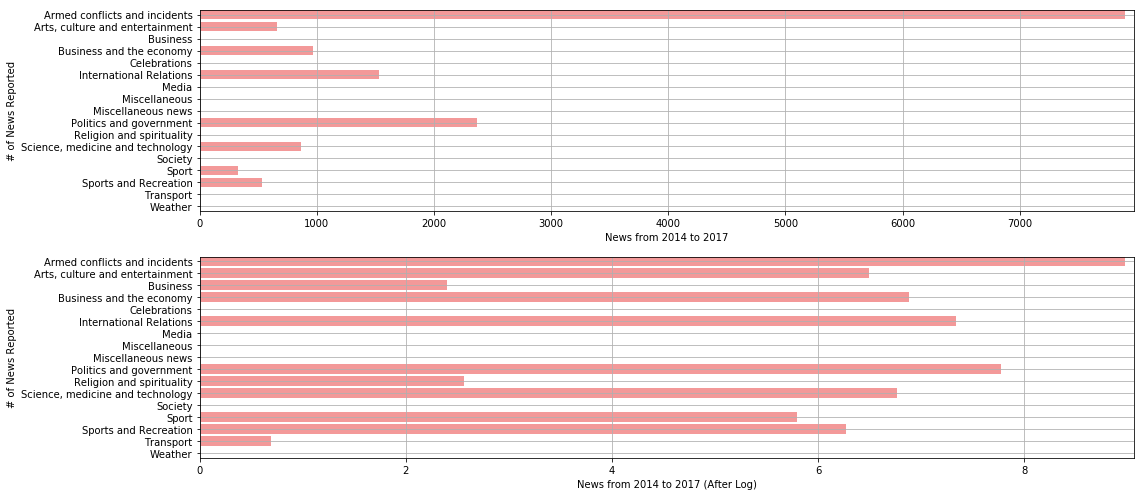

In [244]:
import matplotlib.pyplot as plt
import numpy as np

years = news[(news['year'] >= 2014)]
category = years['category'].unique()
counts = years.groupby(['category']).size().to_frame(name='counts')
#top = counts.quantile(.25).values[0]
t_counts = counts[['counts']].sort_values(by='counts', ascending=False)

x = t_counts.index
y = t_counts.values.ravel()

fig = plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(211)

ax1.set(xlabel='News from 2014 to 2017', ylabel='# of News Reported')
ax1.barh(x, y, color='lightcoral', align='center', alpha=0.8)
ax1.invert_yaxis()
ax1.grid()
ax1.margins(x=0.01, y=0)

ax2 = fig.add_subplot(212)
ax2.set(xlabel='News from 2014 to 2017 (After Log)', ylabel='# of News Reported')
ax2.barh(x, np.log(y), color='lightcoral', align='center', alpha=0.8)
ax2.invert_yaxis()
ax2.grid()
ax2.margins(x=0.01, y=0)

plt.tight_layout()
plt.show()

# How is it related to Crypto-currency?

In [9]:
%matplotlib inline
from Scrapers.Coinmarketcap import coinmarketcap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cmk = coinmarketcap.CoinMarketcap()
coin_names = cmk.coin_names()

In [14]:
coins = cmk.coins()
coin_data = [coin.json() for coin in coins]
coin_data = pd.DataFrame(coin_data)

In [41]:
bitcoin = coins[0]
btc_repo = bitcoin.repo()
start, end = '20140101', '20180228'
bitcoin.get_history(start, end)
btc_history = bitcoin.read_history()
btc_history['dt'] = pd.to_datetime(btc_history['Date'])

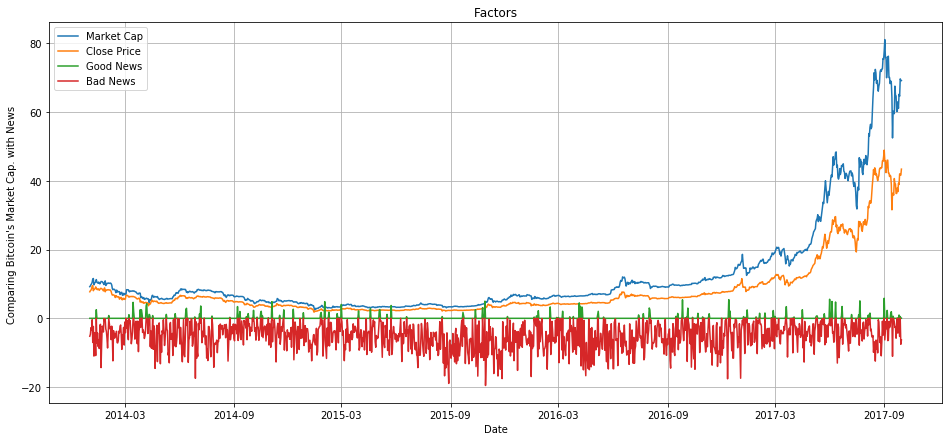

In [71]:
#x = btc_history['dt']
sorce_per_date = news[news['date']>='2014-01-01'].groupby(['date']).sum().reset_index()
btc = btc_history[btc_history['dt'] < '2017-10-01']
btc = btc[['Date','Market Cap','Close','dt']].sort_values(by='dt')
x = sorce_per_date['date']
#x = btc['dt']

good_news = sorce_per_date['score'].apply(lambda x: max(x,0))
bad_news = sorce_per_date['score'].apply(lambda x: min(x,0))

plt.figure(figsize=(16,7))
plt.subplot(1,1,1)
plt.plot(x, btc['Market Cap'] / 1e9, label='Market Cap')
plt.plot(x, btc['Close']/100, label='Close Price')
plt.plot(x, good_news*2, label='Good News')
plt.plot(x, bad_news*2, label='Bad News')
plt.xlabel('Date')
plt.legend()

plt.ylabel("Comparing Bitcoin's Market Cap. with News ")
plt.title("Factors")
plt.grid(True)

# It looks pretty random, lets try other to focus on some category
-------------------------------------------------
Say "Business and finance", "Economy"...  
We can also try Politics and government

In [233]:
news['category'].unique()

array([nan, 'Arts, culture and entertainment',
       'Armed conflicts and incidents', 'Politics and government',
       'Science, medicine and technology', 'Education',
       'Religion and spirituality', 'Sports and Recreation',
       'Business and the economy', 'International Relations', 'Economy',
       'Business', 'Sport', 'Society', 'Architecture', 'Television',
       'Discoveries', 'Weather', 'Bird Deaths', 'Transport', None,
       'Transport\xa0', 'Other', 'Arrests, detentions and prosecutions',
       'Geography', 'Religious affairs', 'Media and people', 'Deaths',
       'Life and death', 'Literature', 'Human rights', 'Exploration',
       'Media', 'Physics', 'Gaming', 'Defence', 'Miscellaneous news',
       'Miscellaneous', 'Celebrations'], dtype=object)

In [309]:
news_l['sci_score'] = news_l[['category','score']].apply(lambda x: x[1] 
                                              if x[0] in sci_key
                                              else 0 , axis=1)


/sharesoft/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [288]:
# any(x[0] in s for s in ['science'])
incidents = news_l[news_l['category'].str.contains('|'.join(sci_key))]
incidents

,category,date,day_of_week,news_header,source_list,source_names,sub_category,year,month,doy,score
46195,"Science, medicine and technology",2014-01-03 00:00:00,Friday,The Philippine Department of Health declares a measles outbreak in Metro Manila. (Solar News),"[[Solar News, http://www.solarnews.ph/news/2014/01/03/doh-declares-measles-epidemic-in-metro-manila1#.Usdv_dJDve8]]",Solar News,,2014,1,3,0
46203,"Science, medicine and technology",2014-01-05 00:00:00,Sunday,A launch of the communication satellite GSAT-14 aboard the GSLV MK.II D5 marks the first successful flight of an Indian cryogenic engine. (The Hindu),"[[The Hindu, http://www.thehindu.com/sci-tech/science/gslvd5-launch-places-india-in-elite-league/article5541607.ece]]",The Hindu,,2014,1,5,0.5994
46229,"Science, medicine and technology",2014-01-08 00:00:00,Wednesday,"Alberta Health Services confirms first avian flu death in Alberta. A person admitted to hospital on January 1, 2014, died on January 3 in Calgary. ()",[],,Influenza A virus subtype H5N1,2014,1,8,-0.8658
46252,"Science, medicine and technology",2014-01-09 00:00:00,Thursday,Mount Sinabung in Indonesia erupts once again. (),"[[, https://www.wired.com/wiredscience/2014/01/eruption-and-humanitarian-crists-at-sinabung-continues/]]",,,2014,1,9,0
46253,"Science, medicine and technology",2014-01-09 00:00:00,Thursday,"A 5.1 magnitude earthquake occurs in the Straits of Florida about 112 miles east of Havana, Cuba, swaying medium rise buildings in city. ()","[[, http://www.mynews13.com/content/news/cfnews13/news/article.html/content/news/articles/cfn/2014/1/9/earthquake_south_of_.html]]",,,2014,1,9,0
46254,"Science, medicine and technology",2014-01-09 00:00:00,Thursday,The first conjoined twin gray whales are found in Mexico. (BBC News),"[[BBC News, http://www.bbc.co.uk/news/world-latin-america-25663557]]",BBC News,,2014,1,9,0
46282,"Science, medicine and technology",2014-01-11 00:00:00,Saturday,X-ray astronomers find evidence of a black hole at the center of a dwarf galaxy gobbling up a star; this is the first such event ever filmed. (),"[[, http://www.astronomy.com/news/2014/01/death-by-black-hole-in-small-galaxy]]",,,2014,1,11,0
46304,"Science, medicine and technology",2014-01-13 00:00:00,Monday,"China conducts the test of a new hypersonic missile vehicle, dubbed the ""WU-14"", which has top speeds of Mach 8 to Mach 12. The weapon was launched on an ICBM. ()","[[, http://www.newsmax.com/Newsfront/china-military-missile-defense/2014/01/13/id/546805]]",,,2014,1,13,0.0258
46323,"Science, medicine and technology",2014-01-15 00:00:00,Wednesday,Australia warns of bushfires due to a 40C (104F) heatwave affecting the country. (BBC),"[[BBC, http://www.bbc.co.uk/news/world-asia-25723867]]",BBC,,2014,1,15,-0.1027
46338,"Science, medicine and technology",2014-01-16 00:00:00,Thursday,A British photographer designs and builds a drone as a low cost alternative for shooting nature documentaries. (Reuters),"[[Reuters, https://www.reuters.com/video/2014/01/16/reuters-tv-beetlecopter-the-low-cost-alternative-fo?videoId=276456872&videoChannel=118065]]",Reuters,,2014,1,16,-0.2732


In [328]:
#news_l = news[news['date']>='2014-01-01']
#news_l[news_l['category'].isnull()] = "Miscellaneous"
sci_key = ['Science, medicine and technology', 'Education', 'Life and death', 'Literature', 'Literature', 'Physics']
incidents_key = ['Armed conflicts and incidents']
business_key = ['Politics and government','Business and the economy','International relations',
                'Economy', 'Business','Society']

# sci = news_l[news_l['category'].str.contains('|'.join(sci_key))]
# incidents = news_l[news_l['category'].str.contains('|'.join(incidents_key))]
# business = news_l[news_l['category'].str.contains('|'.join(business_key))]
news['sci'] = news[['category','score']].apply(lambda x: x[1] if (x[0] or "") in sci_key else 0 , axis=1)
news['incidents'] = news[['category','score']].apply(lambda x: x[1] if (x[0] or "") in incidents_key else 0 , axis=1)
news['business'] = news[['category','score']].apply(lambda x: x[1] if (x[0] or "") in business_key else 0 , axis=1)


In [332]:
sorce_per_date

,date,year,month,doy,score,sci_score,incidents,business,sci
0,2014-01-01,24168,12,12,-2.6057,-2.6057,-2.9372,0.1779,0.0000
1,2014-01-02,16112,8,16,-2.3222,-2.3222,-1.9579,-1.0827,0.0000
2,2014-01-03,16112,8,24,-1.3626,-1.3626,-1.3884,0.0000,0.0000
3,2014-01-04,6042,3,12,-1.7429,-1.7429,-1.7429,0.0000,0.0000
4,2014-01-05,12084,6,30,-0.2059,-0.2059,-1.4177,0.0000,0.5994
5,2014-01-06,20140,10,60,-3.5123,-3.5123,-3.9827,0.0000,0.0000
6,2014-01-07,10070,5,35,-1.1817,-1.1817,-1.9168,0.0000,0.0000
7,2014-01-08,32224,16,128,-5.4915,-5.4915,-4.5469,-0.7003,-0.8658
8,2014-01-09,38266,19,171,-2.0713,-2.0713,-4.8621,1.7388,0.0000
9,2014-01-10,20140,10,100,-3.4423,-3.4423,-2.3988,-0.9155,0.0000


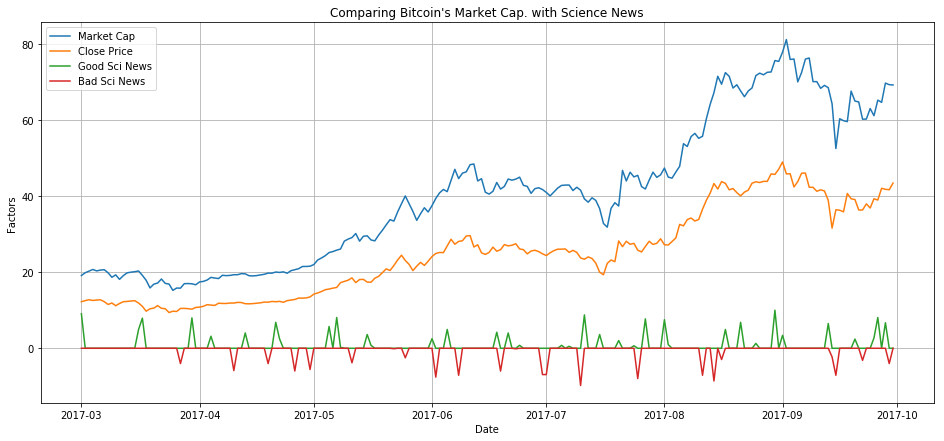

In [390]:
date = '2017-03-01'
sorce_per_date = news[news['date']>=date].groupby(['date']).sum().reset_index()
btc = btc_history[(btc_history['dt'] < '2017-10-01') & (btc_history['dt'] >= date)]
btc = btc[['Date','Market Cap','Close','dt']].sort_values(by='dt')
x = sorce_per_date['date']

good_sci_news = sorce_per_date['sci'].apply(lambda x: max(x,0))
bad_sci_news = sorce_per_date['sci'].apply(lambda x: min(x,0))

good_incidents_news = sorce_per_date['incidents'].apply(lambda x: max(x,0))
bad_incidents_news = sorce_per_date['incidents'].apply(lambda x: min(x,0))

good_business_news = sorce_per_date['business'].apply(lambda x: max(x,0))
bad_business_news = sorce_per_date['business'].apply(lambda x: min(x,0))

plt.figure(figsize=(16,7))
plt.subplot(1,1,1)
plt.plot(x, btc['Market Cap'] / 1e9, label='Market Cap')
plt.plot(x, btc['Close']/100, label='Close Price')
plt.plot(x, good_sci_news*10, label='Good Sci News')
plt.plot(x, bad_sci_news*10, label='Bad Sci News')
# plt.plot(x, good_incidents_news*10, label='Good Incidents News')
# plt.plot(x, bad_incidents_news*10, label='Bad Incidents News')
# plt.plot(x, good_business_news*5, label='Good Business News')
# plt.plot(x, bad_business_news*5, label='Bad Business News')
plt.xlabel('Date')
plt.legend()

plt.ylabel("Factors")
plt.title("Comparing Bitcoin's Market Cap. with Science News")
plt.grid(True)
plt.savefig("Science.png")

In [397]:
(news[(news['date']>='2017-09-10') & (news['date']<'2017-09-20') & (news['score']<0)])

,category,date,day_of_week,news_header,source_list,source_names,sub_category,year,month,doy,score,sci_score,incidents,business,sci,crypo
61168,Armed conflicts and incidents,2017-09-10,Sunday,"Russian airstrikes on several ferries attempting to cross the Euphrates near Deir ez-Zor kill at least 34 civilians, including 9 children, according to the Syrian Observatory for Human Rights. (AFP via )",[],,Russian military intervention in the Syrian Civil War,2017,9,253,-0.6908,-0.6908,-0.6908,0.0000,0.0000,0
61170,Armed conflicts and incidents,2017-09-10,Sunday,"Floods, following torrential rain, kill at least six people in the port city of Livorno, Italy. ()",[],,2017 Livorno floods,2017,9,253,-0.6908,-0.6908,-0.6908,0.0000,0.0000,0
61171,Armed conflicts and incidents,2017-09-10,Sunday,"A gunman shoots seven people dead at a house party in Plano, Texas, amid a domestic dispute. The gunman was then killed after exchanging fire with a Plano Police Department officer. ()",[],,2017 Plano shooting,2017,9,253,-0.9042,-0.9042,-0.9042,0.0000,0.0000,0
61174,Armed conflicts and incidents,2017-09-11,Monday,Militants ambush a police convoy in Egypt's Sinai Peninsula killing 18 police and wounding seven others. (AP),[],,Sinai insurgency,2017,9,254,-0.6597,-0.6597,-0.6597,0.0000,0.0000,0
61176,"Arts, culture and entertainment",2017-09-11,Monday,PETA and David Slater settle the monkey selfie copyright dispute. (CNN),[],,Monkey selfie copyright dispute,2017,9,254,-0.4019,-0.4019,0.0000,0.0000,0.0000,0
61177,Armed conflicts and incidents,2017-09-11,Monday,"Two trains collide in Andermatt railway station in the Canton of Uri, Switzerland, injuring around 30 people. (Reuters)",[],,Rail accidents in 2017,2017,9,254,-0.0772,-0.0772,-0.0772,0.0000,0.0000,0
61180,Armed conflicts and incidents,2017-09-11,Monday,Mouscron mayor Alfred Gadenne is found dead with his throat slashed inside the Belgian city's cemetery. A suspect has reportedly turned himself in to police. (Reuters),[],,Crime in Belgium,2017,9,254,-0.8126,-0.8126,-0.8126,0.0000,0.0000,0
61181,Armed conflicts and incidents,2017-09-11,Monday,Brazil is to investigate the supposed murder of ten members of an Amazonian tribe in the Javari Valley. (),[],,Crime in Brazil,2017,9,254,-0.6908,-0.6908,-0.6908,0.0000,0.0000,0
61188,Armed conflicts and incidents,2017-09-12,Tuesday,"California Governor Jerry Brown signs a bill that will protect all California residents, regardless of their immigration status, from unnecessary detention and questioning; similar to those ordinances in sanctuary cities. ()",[],,Law of California,2017,9,255,-0.0772,-0.0772,-0.0772,0.0000,0.0000,0
61191,Armed conflicts and incidents,2017-09-12,Tuesday,"In an unconfirmed video, the Islamic State of Iraq and the Levant instructs its followers to go and fight in the Philippines instead of the Middle East. (NBC)",[],,Terrorism in the Philippines,2017,9,255,-0.4767,-0.4767,-0.4767,0.0000,0.0000,0


In [363]:
news['crypo'] = news[['news_header','score']].apply(lambda x: x[1] if (x[0] or "") in crypo_keywords else 0 , axis=1)

In [367]:
news[news['date']=='2017-09-01']

,category,date,day_of_week,news_header,source_list,source_names,sub_category,year,month,doy,score,sci_score,incidents,business,sci,crypo
61082,Armed conflicts and incidents,2017-09-01,Friday,"Hurricane Irma, now a Category 2 hurricane with maximum sustained winds of 110 miles per hour (175 kilometers per hour), is expected to resume strengthening this weekend increasing the danger when it nears the Leeward Islands in the Caribbean next Thursday. (Weather Channel) (CNN) (National Hurricane Center)",[],,2017 Atlantic hurricane season,2017,9,244,-0.0516,-0.0516,-0.0516,0.0000,0.00,0
61083,"Science, medicine and technology",2017-09-01,Friday,"Researchers report, in the journal, the discovery of antidepressant concentrations in 10 kinds of fish in the Niagara River, which links to the Great Lakes via Lakes Erie and Ontario. Speculated causes include inadequate treatment of water re-introduced into said bodies of water. ()",[],,Great Lakes,2017,9,244,0.3400,0.3400,0.0000,0.0000,0.34,0
61084,International Relations,2017-09-01,Friday,South Korean President Moon Jae-in and U.S. President Donald Trump agree to revise the South Korea Ballistic Missile Range Guidelines which caps South Korea's missile development. (Reuters),[],,South Korea?United States relations,2017,9,244,0.3612,0.3612,0.0000,0.0000,0.00,0
61085,Armed conflicts and incidents,2017-09-01,Friday,"United States federal judge Richard Posner has announced his retirement after three decades of service on the bench of the 7th U.S. Circuit Court of Appeals, headquartered in Chicago, Illinois. Appointed by President Ronald Reagan in 1981, Justice Posner has written more than 3,300 opinions from the bench.(AP)",[],,United States Court of Appeals for the Seventh Circuit,2017,9,244,0.7351,0.7351,0.7351,0.0000,0.00,0
61086,Politics and government,2017-09-01,Friday,"The Labour Party, led by Jacinda Ardern, surges in the polls and is neck-and-neck with the National Party, led by Bill English, for the race for Prime Minister of New Zealand. ()",[],,"New Zealand general election, 2017",2017,9,244,0.6597,0.6597,0.0000,0.6597,0.00,0
61087,Politics and government,2017-09-01,Friday,"The Supreme Court of Kenya annuls the results of the recent presidential election, that indicated President Uhuru Kenyatta was reelected, due to irregularities, and orders a new election. (BBC)",[],,"Kenyan general election, 2017",2017,9,244,0.5574,0.5574,0.0000,0.5574,0.00,0
61088,Politics and government,2017-09-01,Friday,"Paul Ryan (R-WI), U.S. Speaker of the House of Representatives, urges President Donald Trump not to rescind the Deferred Action for Childhood Arrivals (DACA) program that protects immigrants who illegally entered the U.S. as children from deportation. (Reuters)President Trump nominates Oklahoma congressman Jim Bridenstine, member of the House Committee on Science, Space, and Technology, to be Administrator of the National Aeronautics and Space Administration. (Politico)",[],,Presidency of Donald Trump,2017,9,244,0.3182,0.3182,0.0000,0.3182,0.00,0
61089,"Science, medicine and technology",2017-09-01,Friday,"Asteroid 3122 Florence, which is roughly 2.7 miles (4.4 kilometers) wide, comes within 4.4 million miles (7 million km) of Earth ? approximately 18 times the distance from our planet to the Moon. (Space)",[],,2017 in astronomy,2017,9,244,0.0000,0.0000,0.0000,0.0000,0.00,0


Future Work, we should remove the long term trend by finding a function and remove it.